# Чтение

In [5]:
# необходимые для обработки функции
def split(line, begin, end):
    ans = ""
    curWord = ""
    first = True
    inWord = False

    for i in range(begin, end):
        c = line[i]
        if c == ' ':
            if inWord:
                if first:
                  first = False
                else: 
                  ans = ans + ' '
        
                if curWord != 'N/A':
                    ans = ans + curWord
                curWord = ""
                inWord = False
      
        else: 
            if inWord != True:
                inWord = True
            curWord = curWord + c
    

    if len(curWord) != 0:
        if first:
            first = False
        else: 
            ans = ans + ' '
        if curWord != 'N/A':
            ans = ans + curWord
    return ans

def process(line, mask):
    ans = ""
    first = True
    for i in range(0, len(mask) - 1):
        if first:
          first = False
        else:
            ans = ans + ','
        ans = ans + split(line, mask[i], mask[i + 1])
  
    return ans

def format_name(name):
    name = name.upper()
    name = (name.replace("YA", "IA")
    .replace("YJ", "YI")
    .replace("JU", "IU")
    .replace("JO", "IO")
    .replace("JA", "IA")
    .replace("OJ", "OI")
    .replace("AJ", "AI")
    .replace("IJ", "II")
    .replace("TC", "TS")
    .replace("EJ", "EI")
    .replace("X", "KS")
    .replace("\'", "")
    )
    return name

def format_flight_number(code):
    if code[-2:] == "NO":
        code = code[:-2]
    if code[-3:] == "YES":
        code = code[:-3]
    return code

In [6]:
import pandas as pd
import numpy as np
import transliterate  as tl

In [7]:
mask = [0, 60, 72, 84, 96, 108, 120, 132, 138, 144, 150, 168, 180, 186, 192, 198, 216, 240, 246, 276, 336]

In [8]:
with open('/home/lev/DataScience/SpyCatch/tab/Sirena-export-fixed.tab', 'r') as input_file, open('/home/lev/DataScience/SpyCatch/tab/Sirena-export-fixed.csv', 'w') as output_file:
    output_file.write('PaxName,BirthDate,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,FlightNumber,AirportDeparture,AirportArrival,BookingCode,TicketNumber,TravelDoc,Seat,Meal,Class,Baggage,AdditionalInfo,Programm,ProgrammNumber,AgentInfo\n')
    for line in input_file:
        output_file.write(process(line, mask))
        output_file.write('\n')

# Очистка

In [ ]:
import pandas as pd
import numpy as np
import transliterate  as tl

In [26]:
sirena_df = pd.read_csv('/home/lev/DataScience/SpyCatch/Sirena-export-fixed.csv', dtype = {'ProgrammNumber':str})
sirena_df.reset_index(drop=True, inplace=True)
sirena_df['Programm'] = sirena_df['Programm'].str.rsplit('#', n=1).str[1]
sirena_df['FirstName'] = pd.Series((np.array(sirena_df['PaxName'].str.split().to_list()))[:,1])
sirena_df['SecondName'] = pd.Series((np.array(sirena_df['PaxName'].str.split().to_list()))[:,2])
sirena_df['LastName'] = pd.Series((np.array(sirena_df['PaxName'].str.split().to_list()))[:,0])
sirena_df['FirstName'] = sirena_df['FirstName'].map(lambda x: format_name(tl.translit(x, reversed=True)))
sirena_df['SecondName'] = sirena_df['SecondName'].map(lambda x: format_name(tl.translit(x, reversed=True)))
sirena_df['LastName'] = sirena_df['LastName'].map(lambda x: format_name(tl.translit(x, reversed=True)))
sirena_df['FlightNumber'] = sirena_df['FlightNumber'].map(lambda x: format_flight_number(x))
sirena_df.drop(['Seat', 'Baggage', 'PaxName'], axis=1, inplace=True)
sirena_df.to_csv('/home/lev/DataScience/SpyCatch/tab/tab_cleared.csv', index=False)

In [28]:
tab_df = pd.read_csv('/home/lev/DataScience/SpyCatch/tab/tab_cleared.csv', dtype = {'ProgrammNumber':str})
tab_df


,BirthDate,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,FlightNumber,AirportDeparture,AirportArrival,BookingCode,TicketNumber,TravelDoc,Meal,Class,AdditionalInfo,Programm,ProgrammNumber,AgentInfo,FirstName,SecondName,LastName
0,1999-05-15,2017-05-30,00:05,2017-05-30,08:05,SU1306,SVO,OVB,ZBQSPY,7360415302044672,9375 053270,NaN,J,S,SU,38116280,Go2See,ILDAR,DANIILOVICH,OZEROV
1,NaN,2017-12-27,02:15,2017-12-27,04:40,SU1323,MMK,SVO,MHPBBX,7398421117936516,2244 645520,KSML,Y,9,FB,284903754,NaN,SAMIR,TAMERLANOVICH,KOLOSOV
2,NaN,2017-09-19,06:40,2017-09-19,07:45,SU1481,KJA,SVO,REDLVB,5174973140468001,8115 961316,NaN,Y,F,NaN,NaN,KupiBilet,SNEZHANA,KONSTANTINOVNA,IGNATOVA
3,1999-05-02,2017-03-18,22:10,2017-03-19,01:05,SU1180,SVO,VOG,NSJNGQ,5274206497242737,98 6865148,NaN,J,#,FB,884556993,Travelgenio,PLATON,ALBERTOVICH,ZHAROV
4,1990-12-26,2017-03-18,22:10,2017-03-19,01:05,SU1180,SVO,VOG,VWNYGF,6247422701565929,4396 926588,NaN,Y,NaN,SU,183142068,OZON.travel,NIKOLAI,IGOREVICH,NIKOLSKII
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155752,NaN,2017-02-14,03:10,2017-02-14,04:00,SU1181,VOG,SVO,JYYXED,4714800502596692,3511 319326,STML,Y,F,NaN,NaN,OneTwoTrip,MIROSLAV,SVIATOSLAVOVICH,EMELIANOV
155753,NaN,2017-02-14,03:10,2017-02-14,04:00,SU1181,VOG,SVO,XDKDZF,6730365623280343,2199 078129,NaN,Y,T,DT,261604825,OZON.travel,ARTEMII,GERMANOVICH,TARASOV
155754,1970-10-28,2017-02-14,03:10,2017-02-14,04:00,SU1181,VOG,SVO,SOWGLC,1569746161308219,7351 760618,NaN,Y,F,FB,902862806,Aeroflot,BORIS,SVIATOGOROVICH,GOROHOV
155755,1994-02-14,2017-05-18,06:30,2017-05-18,08:35,SU1158,SVO,ROV,SNRBXU,8653871661040452,3256 077151,NaN,Y,#,NaN,NaN,NaN,RAMIL,SVIATOSLAVOVICH,DOROFEEV


In [31]:
tab_df = tab_df.groupby(['TravelDoc'])['TicketNumber'].count()
tab_df = tab_df.reset_index(name='TotalFlights')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
my_colors = ['#ff9973', '#5efffd', '#ffd6e1', '#e898ac','#1a5e8f', '#fc723f', '#f64975']

plt.rcParams['axes.facecolor'] = '#002845'
plt.rcParams['figure.facecolor'] = '#002845'
plt.rcParams['text.color'] = '#002845'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.labelcolor'] = 'white'
plt.rcParams['ytick.labelcolor'] = 'white'
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=my_colors)
plt.rcParams['legend.labelcolor'] = 'white'

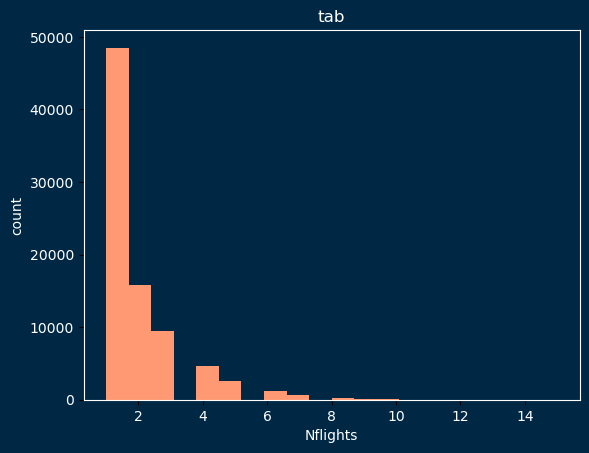

In [50]:
plt.hist(tab_df['TotalFlights'], bins=20) # 'column_name' is the column you want to plot

plt.xlabel("Nflights")
plt.ylabel("count")
plt.title("tab")


plt.show()

In [42]:
xml_df = pd.read_csv('/home/lev/DataScience/SpyCatch/xml/xml_cleared.csv', dtype = {'ProgrammNumber':str})
xml_df = xml_df.groupby(['uid'])['FlightNumber'].count()
xml_df = xml_df.reset_index(name='TotalFlights')

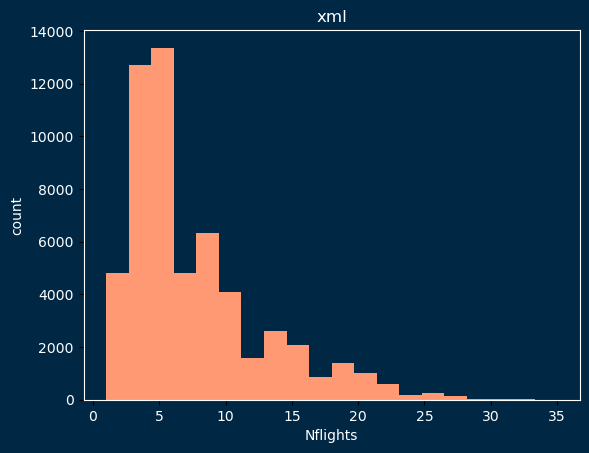

In [52]:
import matplotlib.pyplot as plt
# Create the histogram
plt.hist(xml_df['TotalFlights'], bins=20) # 'column_name' is the column you want to plot

# Add labels and title
plt.xlabel("Nflights")
plt.ylabel("count")
plt.title("xml")


# Display the histogram
plt.show()